In [ ]:
import pandas as pd
df=pd.read_csv('/content/lab7_task1_Final.csv')
df.head()

,id,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,target
0,0,5,1,1,1,2,1.0,3,1,1,2
1,1,5,4,4,5,7,10.0,3,2,1,2
2,2,3,1,1,1,2,2.0,3,1,1,2
3,3,6,8,8,1,3,4.0,3,7,1,2
4,4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df.isna()

,id,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df =df.fillna(df.mean())

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
Y=df['target']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
cross_val_scores =cross_val_score(knn,X,Y,cv=kf)


In [ ]:
cross_val_scores

array([0.92857143, 0.92857143, 0.94285714, 0.88571429, 0.85714286,
       0.95714286, 0.87142857, 0.88571429, 0.88571429, 0.92753623])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc =SVC()


k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
cross_val_scores =cross_val_score(svc,X,Y,cv=kf)
cross_val_scores


array([0.65714286, 0.7       , 0.68571429, 0.6       , 0.58571429,
       0.71428571, 0.62857143, 0.68571429, 0.64285714, 0.65217391])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn =KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,prediction)
conf_matrix

array([[46,  0],
       [ 4, 20]])

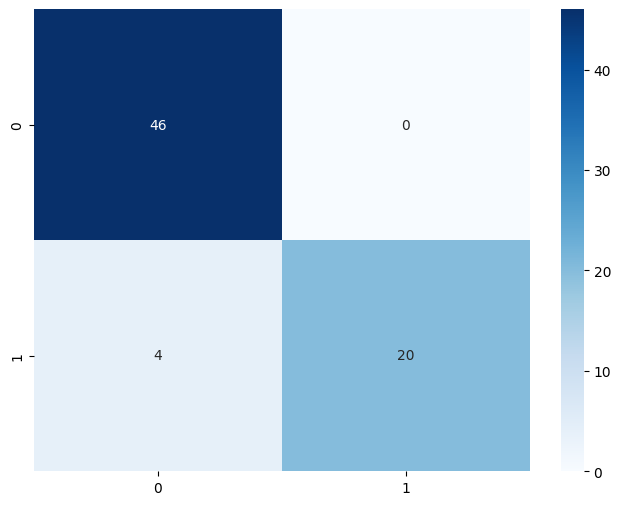

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap='Blues')
plt.show()

In [ ]:
from sklearn.svm import SVC
svc =SVC()
modelsvc = svc.fit(x_train,y_train)
prediction2 = modelsvc.predict(x_test)
conf_matrix2 = confusion_matrix(y_test,prediction2)
conf_matrix2

array([[46,  0],
       [24,  0]])

In [ ]:
trainpredict2=modelsvc.predict(x_train)


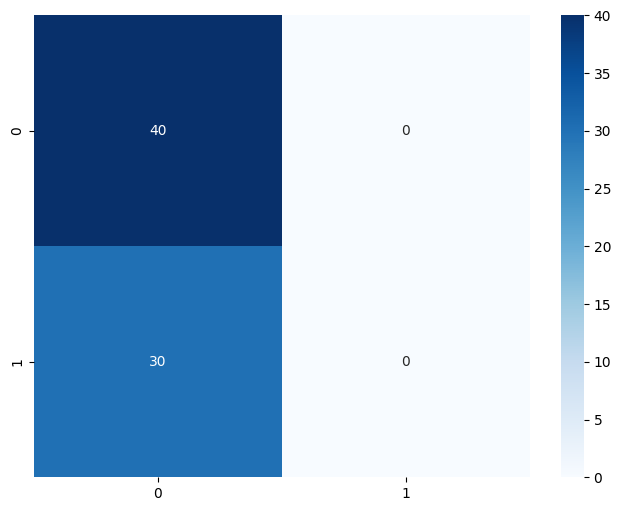

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix2,annot=True,fmt='g',cmap='Blues')
plt.show()

In [ ]:
#knn
from sklearn.metrics import accuracy_score
accuracy_score= accuracy_score(y_test,prediction)
accuracy_score

0.8571428571428571

In [ ]:
from sklearn.metrics import accuracy_score
trainpredict = knn.predict(x_train)
accuracy_score(y_train,trainpredict)

0.9332273449920508

In [ ]:
from sklearn.metrics import recall_score
recall_scores = recall_score(y_test, prediction, pos_label=2)
recall_scores

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_scorestrain = recall_score(y_train,trainpredict,pos_label=2)
recall_scorestrain

0.9878640776699029

In [ ]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(y_test,prediction).ravel()
specificity = (tn/(tn+fp))
specificity

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
tnt,fpt,fnt,tpt = confusion_matrix(y_train,trainpredict).ravel()
specificitytrain= (tnt/(tnt+fpt))
specificitytrain

0.9878640776699029

In [ ]:
#false discovery rate
false_discovery_rate = (fp/(fp+tp))
false_discovery_rate

0.0

In [ ]:
#false discovery rate
false_discovery_ratetrain = (fpt/(fpt+tpt))
false_discovery_ratetrain

0.02702702702702703

In [ ]:
#false_ommision_rate
false_ommision_rate = (fn/(fn+tn))
false_ommision_rate

0.08

In [ ]:
#false_ommision_rate
false_ommision_ratetrain = (fnt/(fnt+tnt))
false_ommision_ratetrain

0.08333333333333333

In [ ]:
#svm
from sklearn.metrics import accuracy_score
accuracy_score2= accuracy_score(y_test,prediction2)
accuracy_score2

0.6571428571428571

In [ ]:
#svm
from sklearn.metrics import accuracy_score
accuracy_score2train= accuracy_score(y_train,trainpredict2)
accuracy_score2train

0.6550079491255962

In [ ]:
from sklearn.metrics import recall_score
recall_scores2 = recall_score(y_test,prediction2,pos_label=2)
recall_scores2

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_scores2train=recall_score(y_train,trainpredict2,pos_label=2)
recall_scores2train

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
tn2,fp2,fn2,tp2 = confusion_matrix(y_test,prediction2).ravel()
specificity2 = (tn2/(tn2+fp2))
specificity2

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
tn2train,fp2train,fn2train,tp2train = confusion_matrix(y_test,prediction2).ravel()
specificity2train = (tn2train/(tn2train+fp2train))
specificity2train

1.0

In [ ]:
if (fp2 + tp2) != 0:
    false_discovery_rate2 = (fp2 / (fp2 + tp2))
else:
    false_discovery_rate2 = 0
false_discovery_rate2

0

In [ ]:
if (fp2train + tp2train) != 0:
    false_discovery_rate2train = (fp2train / (fp2train + tp2train))
else:
    false_discovery_rate2train = 0
false_discovery_rate2train

0

In [ ]:
#false_ommision_rate
false_ommision_rate2 = (fn2/(fn2+tn2))
false_ommision_rate2

0.34285714285714286

In [ ]:
#false_ommision_rate
false_ommision_rate2train = (fn2train/(fn2train+tn2train))
false_ommision_rate2train

0.34285714285714286